In [2]:
import pandas as pd
from pandas.errors import OutOfBoundsDatetime
from matplotlib import pyplot as plt
from src.models.tasks.multimodal import DATA_GENERATORS

from src.utils import read_jsonl, write_jsonl
import textwrap
import numpy as np
import os

%load_ext autoreload
%autoreload 2

[2023-11-10 13:30:27,342] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


## GPT-4 Scenarios

In [4]:
# Prompt asks for shorter summaries and simpler siuations
v2_data = read_jsonl('data/processed/ts2desc/v2.jsonl')

In [5]:
v2_data[0]["metadata"]

{'start': '2022-03-01 00:00:00',
 'end': '2022-03-15 00:00:00',
 'units': 'Degrees Celsius',
 'frequency': 'Every 6 hours'}

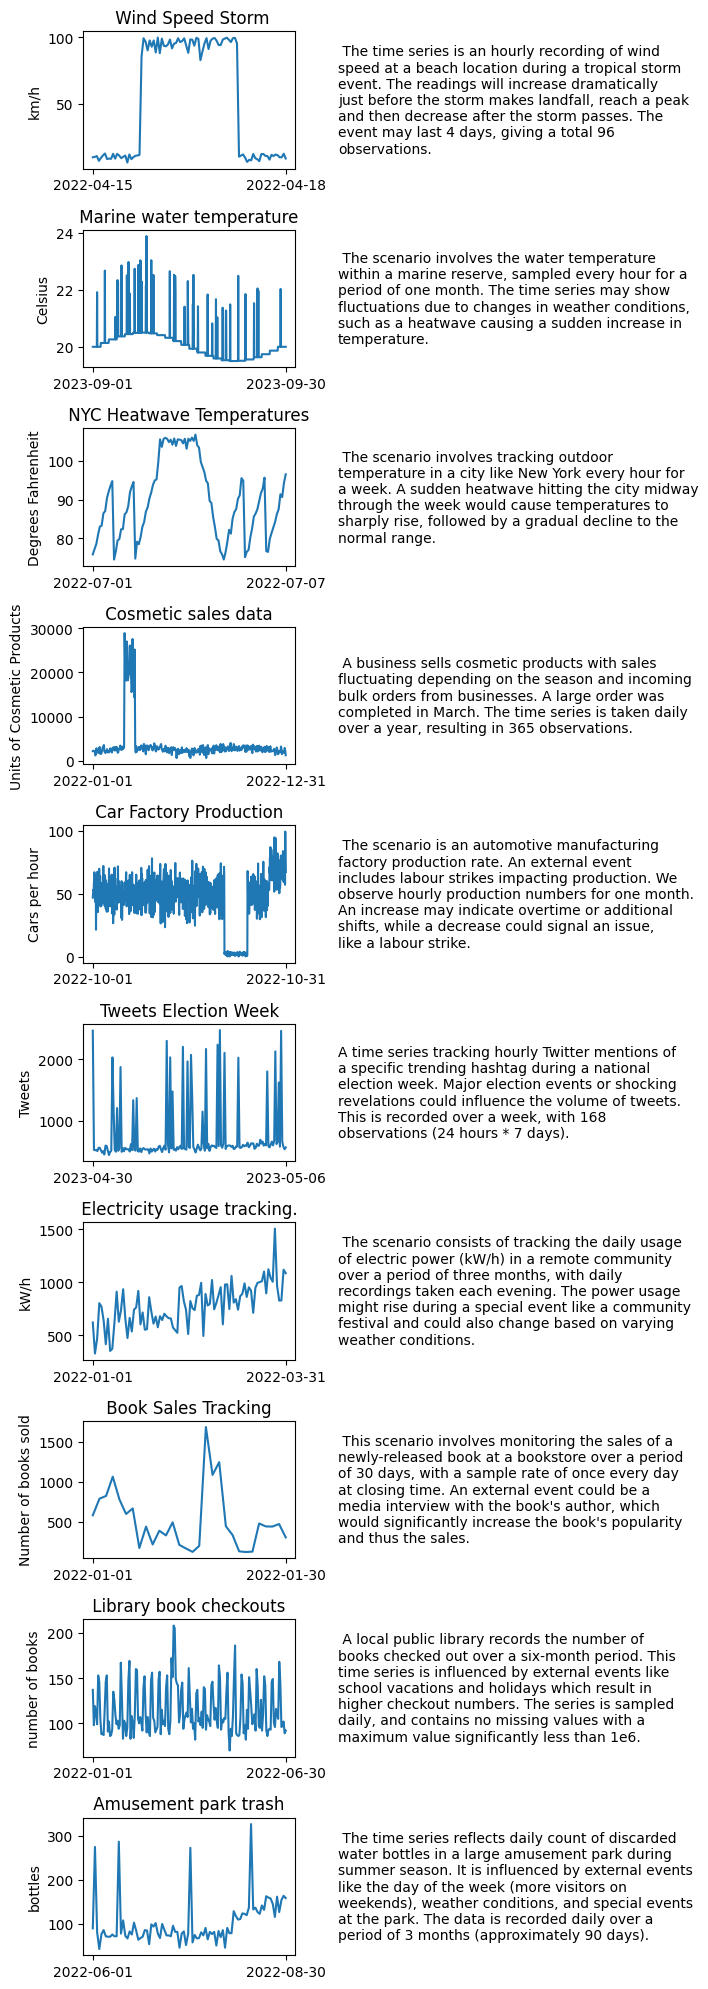

In [13]:
n_v2_samples = 10
fig, axes = plt.subplots(n_v2_samples, 1, figsize=(8, 20))
i=0
i_start=110
n_plotted = 0
while n_plotted < n_v2_samples:
    sample = v2_data[i_start:][i]
    ts = sample['series']
    desciption = sample['description']
    desciption_tiny = sample['description_tiny']
    start = sample['metadata']['start']
    end = sample['metadata']['end']
    units = sample['metadata']['units']

    try:
        x = pd.date_range(start=start, end=end, periods=len(ts))
    except OutOfBoundsDatetime:
        x = range(len(ts))
        print("Warning: OutOfBoundsDatetime")
        i+=1
        continue
    
    axes[n_plotted].plot(x,ts)
    axes[n_plotted].set_title(desciption_tiny)
    # Put description in box to the right of each subplot (with text wrapping)
    axes[n_plotted].text(1.2, 0.5, textwrap.fill(desciption, 50), fontsize=10, transform=axes[n_plotted].transAxes, va='center')
    # Set xticks to just first and last
    axes[n_plotted].set_xticks([x[0], x[-1]])
    axes[n_plotted].set_ylabel(units)
    i += 1
    n_plotted += 1
plt.tight_layout()


## Statistical MCQ

In [26]:
stat_mcqs = read_jsonl("/gscratch/bdata/datasets/llms_and_timeseries/ts2stats_mcq/train.json")

In [27]:
results = []
for mcq in stat_mcqs:
    mcq["label"] = mcq["options"][mcq["answer_index"]]
    results.append(mcq)
write_jsonl(results, "data/processed/ts2stats_mcq/train.json")